---
## Création de la Base de Données pour $\pi^2$ Trading
---

### Introduction 
Ce projet repose principalement sur les données fournies par la bibliothèque **yfinance** : prix des actions, performances passées, capitalisation boursière, résumé des entreprises, ratios financiers, etc. Cependant, pour garantir une facilité d’utilisation optimale, nous avons ajouté une base de données enrichie avec des informations complémentaires.

### Objectif de la Base de Données
Nous avons intégré les **noms des entreprises**, leur **ticker associé**, ainsi que l’**indice de référence** dans lequel elles sont cotées. Cette structure permet à l’utilisateur de simplement entrer le nom d’une entreprise qu’il souhaite analyser ou ajouter à son portefeuille, sans nécessairement connaître son ticker. Cela améliore significativement l’ergonomie et l’efficacité de la plateforme.

### Méthodologie
Pour construire cette base, nous avons décidé de **webscraper Wikipédia**, une source fiable et facilement accessible, afin d’extraire les données essentielles. Nous avons collecté les compositions des indices suivants :
- **S&P 500**
- **CAC 40**
- **DAX**
- **FTSE MIB**
- **FTSE 100**
- **IBEX 35**

### Limitation et Choix Excluant le Russell 2000
Nous avions initialement inclus la composition complète du **Russell 2000**, mais nous avons décidé de l’exclure pour des raisons pratiques. Cet indice, composé de small caps américaines, présente des entreprises souvent nouvellement cotées, ce qui limite la disponibilité des données historiques. L’absence de ces données empêchait un calcul fiable de la frontière d’efficience dans notre module d’optimisation. Pour simplifier, nous avons donc préféré retirer cet indice de notre base.

### Résultat
Ci-dessous, vous trouverez :
1. Le code utilisé pour webscraper les pages Wikipédia nécessaires.
2. Des statistiques descriptives simples de notre base de données, offrant une vue d’ensemble des informations collectées.
---

In [ ]:
# Import des libraries nécessaires
import pandas as pd
import importlib
import data_fonctions as dgf
importlib.reload(dgf)

<module 'data_fonctions' from '/home/onyxia/work/Pi.Squared.Trading/Data/data_fonctions.py'>

---
#### S&P 500 - U.S.A.
---

In [6]:
# Chargement des données pour l'indice S&P 500
url_snp500 = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
df_snp500 = dgf.obtenir_liste_entreprises(url_snp500, 'S&P 500')

# Nettoyage initial des données
df_snp500 = dgf.nettoyage_snp500(df_snp500)

# Affichage
df_snp500.head()

,Ticker,Company,Ind
0,MMM,3M,S&P 500
1,AOS,A. O. Smith,S&P 500
2,ABT,Abbott Laboratories,S&P 500
3,ABBV,AbbVie,S&P 500
4,ACN,Accenture,S&P 500


---
#### CAC 40 - France
---

In [7]:
# On fait de même pour l'indice CAC 40
url_cac40 = "https://en.wikipedia.org/wiki/CAC_40"
df_cac40 = dgf.obtenir_liste_entreprises(url_cac40, 'CAC 40')

df_cac40 = dgf.nettoyage_cac40(df_cac40)

df_cac40.head()

,Ticker,Company,Ind
0,AC.PA,Accor,CAC 40
1,AI.PA,Air Liquide,CAC 40
2,AIR.PA,Airbus,CAC 40
3,MT.AS,ArcelorMittal,CAC 40
4,CS.PA,Axa,CAC 40


---
#### DAX - Allemagne
---

In [8]:
# On fait de même pour l'indice DAX
url_dax = "https://en.wikipedia.org/wiki/DAX"
df_dax = dgf.obtenir_liste_entreprises(url_dax, 'DAX')

df_dax = dgf.nettoyage_dax(df_dax)

df_dax.head()

,Ticker,Company,Ind
0,ADS.DE,Adidas,DAX
1,AIR.PA,Airbus,DAX
2,ALV.DE,Allianz,DAX
3,BAS.DE,BASF,DAX
4,BAYN.DE,Bayer,DAX


---
#### FTSE MIB - Italie
---

In [9]:
# On fait de même pour l'indice FTSE MIB
url_ftsemib = "https://en.wikipedia.org/wiki/FTSE_MIB"
df_ftsemib = dgf.obtenir_liste_entreprises(url_ftsemib, 'FTSE MIB')

df_ftsemib = dgf.nettoyage_ftsemib(df_ftsemib)

df_ftsemib.head()

,Ticker,Company,Ind
0,A2A.MI,A2A,FTSE MIB
1,AMP.MI,Amplifon,FTSE MIB
2,AZM.MI,Azimut,FTSE MIB
3,BMED.MI,Banca Mediolanum,FTSE MIB
4,BMPS.MI,Banca Monte dei Paschi di Siena,FTSE MIB


---
#### FTSE 100 - U.K.
---

In [10]:
# On fait de même pour l'indice FTSE 100
url_ftse100 = "https://en.wikipedia.org/wiki/FTSE_100_Index"
df_ftse100 = dgf.obtenir_liste_entreprises(url_ftse100, 'FTSE 100')

df_ftse100 = dgf.nettoyage_ftse100(df_ftse100)

df_ftse100.head()

,Ticker,Company,Ind
0,III.L,3i,FTSE 100
1,ADM.L,Admiral Group,FTSE 100
2,AAF.L,Airtel Africa,FTSE 100
3,ALW.L,Alliance Witan,FTSE 100
4,AAL.L,Anglo American plc,FTSE 100


---
#### IBEX 35 - Espagne
---

In [11]:
# On fait de même pour l'indice IBEX 35
url_ibex35 = "https://en.wikipedia.org/wiki/IBEX_35"
df_ibex35 = dgf.obtenir_liste_entreprises(url_ibex35, 'IBEX 35')

df_ibex35 = dgf.nettoyage_ibex35(df_ibex35)

df_ibex35.head()

,Ticker,Company,Ind
0,ACS.MC,ACS,IBEX 35
1,ACX.MC,Acerinox,IBEX 35
2,AENA.MC,Aena,IBEX 35
3,AMS.MC,Amadeus IT Group,IBEX 35
4,ANA.MC,Acciona,IBEX 35


---
### Concaténation des données
---

In [13]:
data_pisquared = pd.concat(
    [df_snp500, df_cac40, df_dax, df_ftsemib, df_ftse100, df_ibex35], 
    ignore_index=True)

---
### Statistiques Descriptives
---

In [14]:
# Import des libraries nécessaires
import matplotlib.pyplot as plt
import folium

In [25]:
# Par simplicité on utilise df au lieu de data_pisquared
df = data_pisquared

# Statistiques descriptives
total_rows = df.shape[0]
companies_per_index = df['Ind'].value_counts()
missing_values = df.isnull().sum()
index_distribution = df['Ind'].value_counts(normalize=True) * 100 # Calculer la répartition en pourcentage

print("Nombre total de lignes :", total_rows)
print("Nombre d'entreprises par indice boursier :", companies_per_index)
print("Valeurs manquantes par colonne :", missing_values)

Nombre total de lignes : 757
Nombre d'entreprises par indice boursier : Ind
S&P 500     502
FTSE 100    100
CAC 40       40
DAX          40
FTSE MIB     40
IBEX 35      35
Name: count, dtype: int64
Valeurs manquantes par colonne : Ticker     0
Company    0
Ind        0
dtype: int64


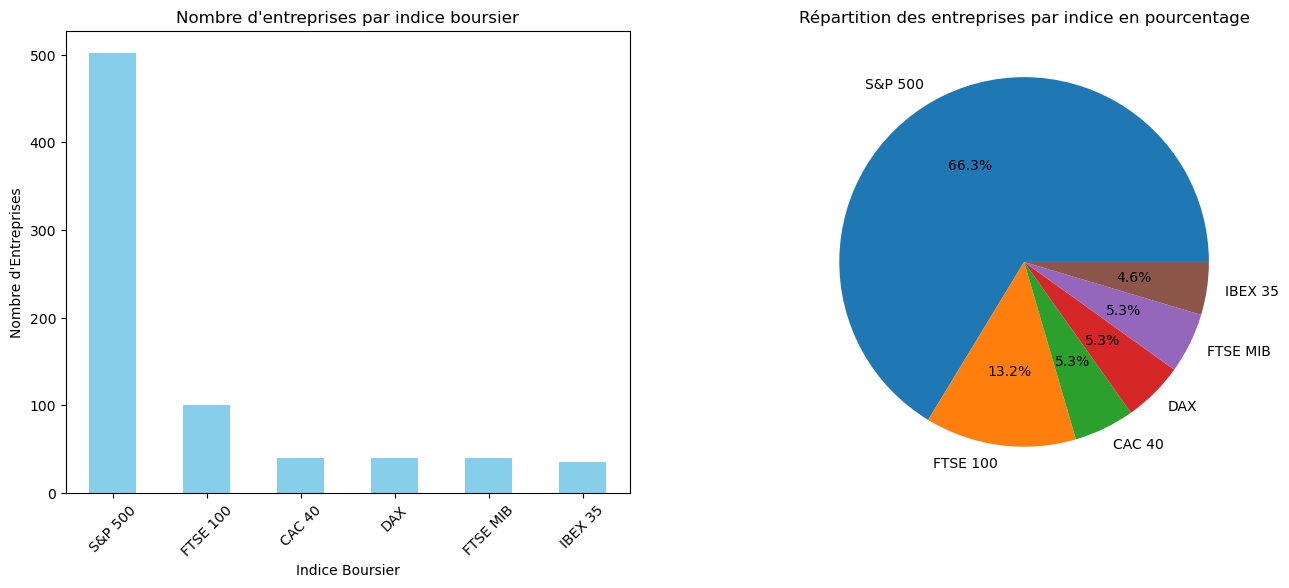

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Nombre d'entreprises par indice boursier
companies_per_index.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Nombre d\'entreprises par indice boursier')
axes[0].set_xlabel('Indice Boursier')
axes[0].set_ylabel('Nombre d\'Entreprises')
axes[0].tick_params(axis='x', rotation=45)

# Graphique 2 : Répartition en pourcentage
axes[1].pie(index_distribution, labels=index_distribution.index, autopct='%1.1f%%')
axes[1].set_title('Répartition des entreprises par indice en pourcentage')

plt.show()

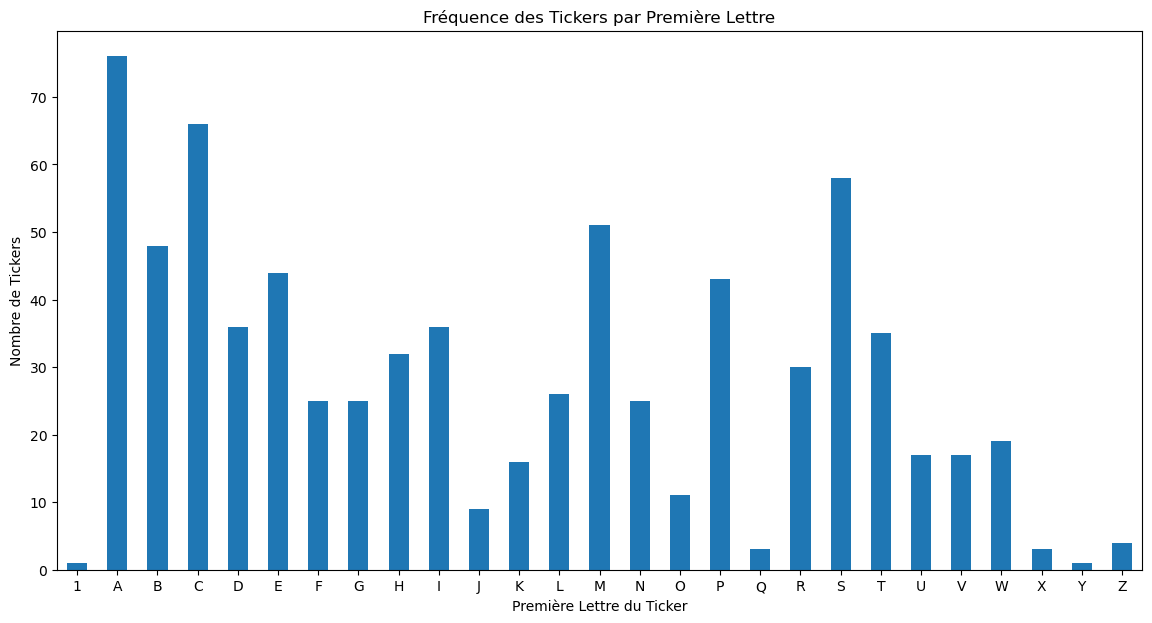

In [11]:
# Extraire la première lettre de chaque ticker
df['First_Letter'] = df['Ticker'].apply(lambda x: x[0])

# Compter les occurrences de chaque lettre
letter_counts = df['First_Letter'].value_counts().sort_index()

# Visualisation
plt.figure(figsize=(14, 7))
letter_counts.plot(kind='bar')
plt.title('Fréquence des Tickers par Première Lettre')
plt.xlabel('Première Lettre du Ticker')
plt.ylabel('Nombre de Tickers')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Définir le dictionnaire des indices aux pays
index_to_country = {
    'S&P 500': 'United States',
    'CAC 40': 'France',
    'DAX': 'Germany',
    'FTSE MIB': 'Italy',
    'FTSE 100': 'United Kingdom',
    'IBEX 35': 'Spain'
}

# Définir les coordonnées pour les capitales de ces pays
country_coordinates = {
    'United States': (38.9072, -77.0369),  # Washington, D.C.
    'France': (48.8566, 2.3522),           # Paris
    'Germany': (52.5200, 13.4050),         # Berlin
    'Italy': (41.9028, 12.4964),           # Rome
    'United Kingdom': (51.5074, -0.1278),  # London
    'Spain': (40.4168, -3.7038)            # Madrid
}

# Créer la colonne 'Country'
df['Country'] = df['Ind'].map(index_to_country)

# Calculer le nombre d'entreprises par pays
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Créer une carte (GPT)
map = folium.Map(location=[48.8566, 2.3522], zoom_start=3)

# Ajouter des données par pays (GPT)
for _, row in country_counts.iterrows():
    country = row['Country']
    count = row['Count']
    if country in country_coordinates:
        folium.CircleMarker(
            location=country_coordinates[country],
            radius=10,
            popup=f"{country}: {count} entreprises",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(map)

# Afficher la carte
map.save('index.html')

In [31]:
map